In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
def compare_weather_forecast(historical_df, forecast_df, date_column, value_column):
    """
    Compare historical weather data with the current forecast using a graph with a confidence interval.

    Parameters:
    - historical_df: DataFrame containing historical weather data.
    - forecast_df: DataFrame containing the current weather forecast data.
    - date_column: Name of the column in both DataFrames containing the date information.
    - value_column: Name of the column in both DataFrames containing the weather variable to compare.

    Returns:
    - None (the function will display the graph).
    """
    # Merge the two DataFrames on the date_column
    merged_df = pd.merge(historical_df, forecast_df, on=date_column, suffixes=('_historical', '_forecast'))

    # Create a scatter plot with a line connecting the historical and forecast values
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=merged_df[date_column], y=merged_df[value_column + '_historical'], label='Historical')
    sns.scatterplot(x=merged_df[date_column], y=merged_df[value_column + '_forecast'], label='Forecast')

    # Add confidence interval around the forecast line
    plt.fill_between(merged_df[date_column],
                     merged_df[value_column + '_forecast'] - merged_df[value_column + '_forecast'].std(),
                     merged_df[value_column + '_forecast'] + merged_df[value_column + '_forecast'].std(),
                     alpha=0.2, color='blue')

    # Set plot labels and title
    plt.xlabel('Date')
    plt.ylabel(value_column)
    plt.title(f'Comparison of Historical Data and Forecast for {value_column}')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# historical_data = pd.read_csv('historical_weather.csv')
# forecast_data = pd.read_csv('forecast_weather.csv')
# compare_weather_forecast(historical_data, forecast_data, 'date', 'temperature')

In [37]:
historical_data = pd.read_csv(r'C:/Users/camer/Documents/Stat386/weather386/weather history csv/history.csv')
forecast_data = pd.read_csv(r'C:/Users/camer/Documents/Stat386/weather386/forecast_csv/df_maxTemperature.csv')

In [38]:
forecast_data['date'] = forecast_data['validTime'].str[5:10]
#forecast_data = forecast_data[forecast_data['date'] == '11-20']
forecast_data


,validTime,value,date
0,2023-11-20T15:00:00+00:00/PT11H,6.666667,11-20
1,2023-11-21T13:00:00+00:00/PT13H,7.222222,11-21
2,2023-11-22T13:00:00+00:00/PT13H,11.666667,11-22
3,2023-11-23T13:00:00+00:00/PT13H,8.333333,11-23
4,2023-11-24T13:00:00+00:00/PT13H,1.666667,11-24
5,2023-11-25T13:00:00+00:00/PT13H,3.333333,11-25
6,2023-11-26T13:00:00+00:00/PT13H,6.666667,11-26
7,2023-11-27T13:00:00+00:00/PT13H,7.222222,11-27


In [40]:
historical_data['date'] = historical_data['time'].str[5:10]
historical_data['value'] = historical_data['temperature_2m_max']
historical_data = historical_data[historical_data['date'].isin(forecast_data['date'])]
historical_data

,Unnamed: 0,time,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,date,value
5,5,1950-11-20,43.1,35.0,0.181,0.181,0.0,11.0,20.6,11-20,43.1
6,6,1950-11-21,42.7,35.0,0.000,0.000,0.0,11.6,20.8,11-21,42.7
7,7,1950-11-22,48.5,36.9,0.020,0.020,0.0,9.7,17.2,11-22,48.5
8,8,1950-11-23,43.6,38.7,0.047,0.047,0.0,13.2,26.4,11-23,43.6
9,9,1950-11-24,45.7,36.8,0.031,0.031,0.0,12.4,23.5,11-24,45.7
...,...,...,...,...,...,...,...,...,...,...,...
26306,26306,2022-11-23,43.1,27.7,0.000,0.000,0.0,8.8,14.8,11-23,43.1
26307,26307,2022-11-24,39.8,29.7,0.000,0.000,0.0,5.5,9.2,11-24,39.8
26308,26308,2022-11-25,43.8,35.3,0.193,0.193,0.0,7.6,12.8,11-25,43.8
26309,26309,2022-11-26,47.0,37.4,0.012,0.012,0.0,8.5,15.2,11-26,47.0


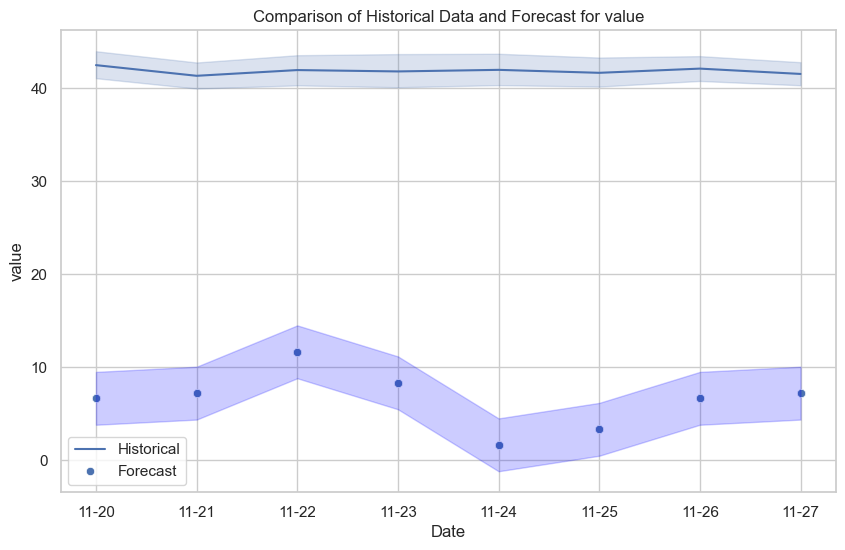

In [41]:
compare_weather_forecast(historical_data, forecast_data, 'date', 'value')